# I. Introduction

Let's explore salaries data-set. Here we will try predictions with **Support Vector Regression** model.

Here is our task: we have a person comming to interview, who used to be a Partner in former organization. 

She will ask a salay rise - what shall it be?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
regressor = DecisionTreeRegressor()

In [10]:
x = [[0,0], [2, 2]]
y = [0.5, 2.5]

regressor.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

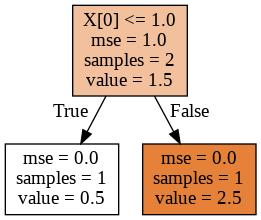

In [12]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(regressor, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# II. Implementation. Example 1

# 1. Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# 2. Import a Data-Set

In [3]:
se_file_name = "/content/drive/MyDrive/Data analytics course/position_salaries.csv"
se_df = pd.read_csv(se_file_name)
se_df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


For exploration purpose - let's re-create Linear Regression and see - how it been trained.

In [4]:
#X
independant_var = se_df.iloc[:, 1:2].values

#y
dependant_var = se_df.iloc[:, -1].values

In [5]:
independant_var

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
dependant_var

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

#3. Feature Scaling

**Beauty of Decision Trees doesn't need features to be scaled (neither normalized nor standartized).**

# 4. Split Data-Set into Training and Test sets

**We will skip it here, too.**

# 5. Training of Machine Learning Model with Descision Tree  Regression

In [13]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(independant_var, dependant_var)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

# 6. Run a Prediction

In [14]:
y_pred = regressor.predict([[7.5]])
y_pred

array([200000.])

# 7. Visualize results

**Smoother Visualization**

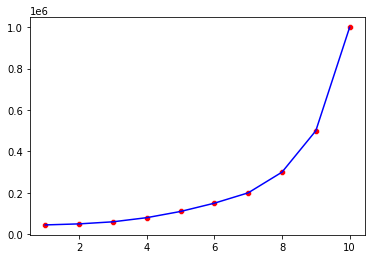

In [16]:
sns.scatterplot(x=independant_var[:, 0], y=dependant_var, color='red')
plt.plot(independant_var, regressor.predict(independant_var), color='blue')

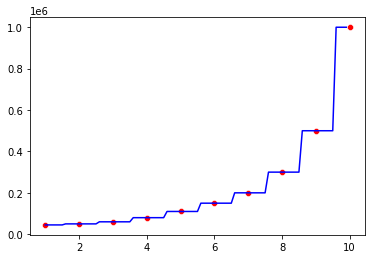

In [18]:
import numpy as np

independant_var_grid = np.arange(min(independant_var), max(independant_var), 0.1)
independant_var_grid_reshape = independant_var_grid.reshape(len(independant_var_grid), 1) #2d masīvs

sns.scatterplot(x=independant_var[:, 0], y=dependant_var, color='red')
plt.plot(independant_var_grid_reshape, regressor.predict(independant_var_grid_reshape), color='blue')

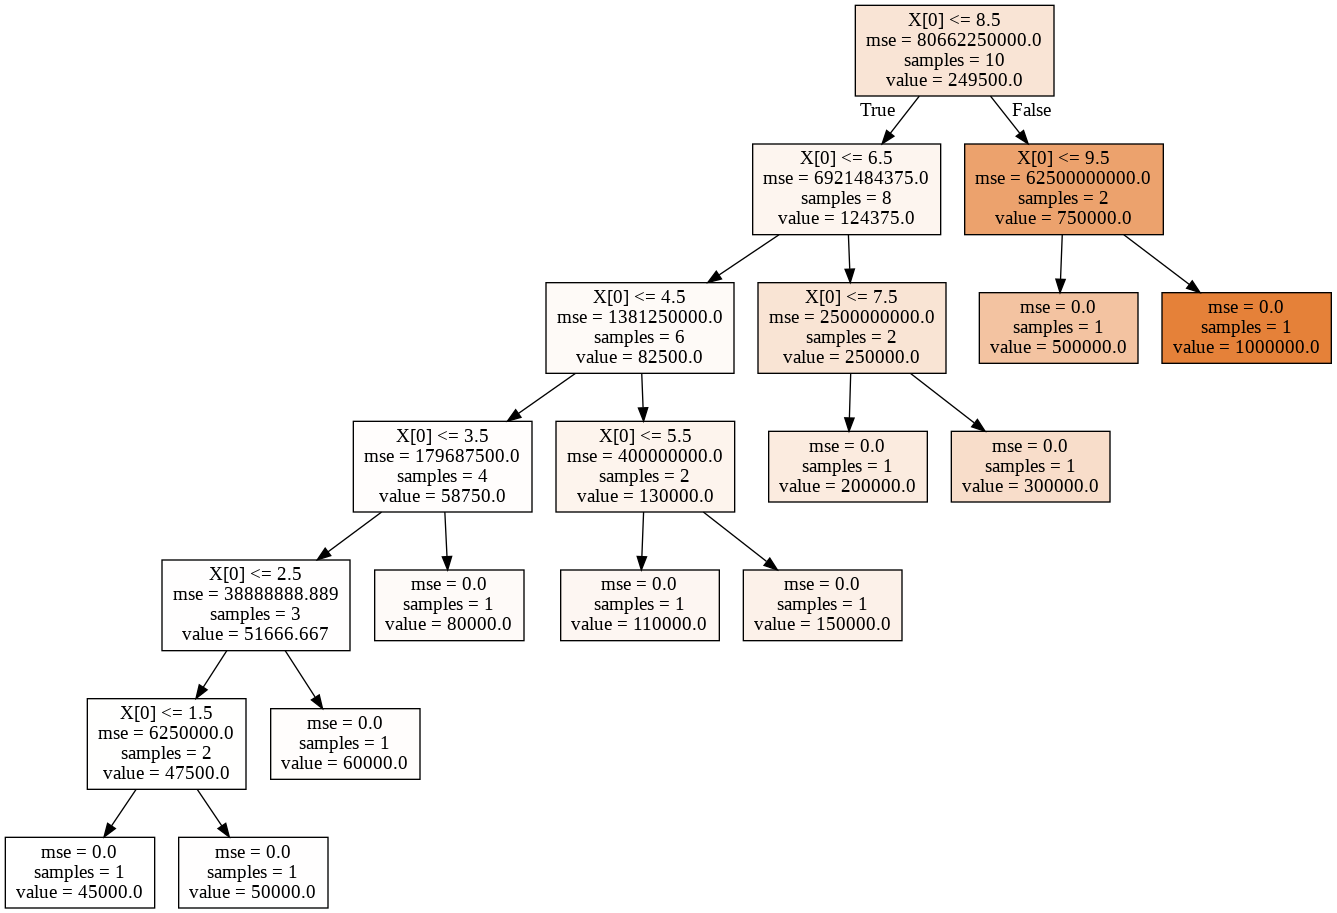

In [19]:
dot_data = export_graphviz(regressor, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# III. Implementation. Example 2

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [25]:
from sklearn import datasets

boston = datasets.load_boston()
df = pd.DataFrame(boston.data[:, 12])
df.columns = ["LSTAT"]
df["MEDV"] = boston.target
df

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [46]:
X = df[["LSTAT"]].values
y = df["MEDV"]

#sort_index

sort_index = X.flatten().argsort() #sasortē indexus no mazākā uz augstāko

X = X[sort_index] #sortēti indexi
y = y[sort_index] #pēc kārtas izvada sortētos indexus

dt_reg_model = DecisionTreeRegressor(max_depth=8)
dt_reg_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [47]:
dot_data = export_graphviz(dt_reg_model, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

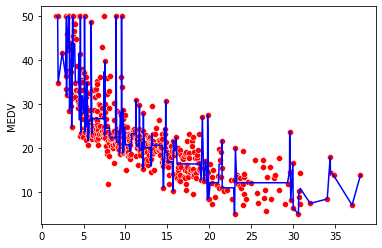

In [48]:
sns.scatterplot(x=X[:, 0], y=y, color="red")
plt.plot(X, dt_reg_model.predict(X), color="blue")